In this notebook, I have implemented **Adversarial Auto Encoder** to generate the Picture data and the I calculated **FIDs** and **Inception Score** on between **real** and **Generated data**




In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential, load_model
from numpy import cov , iscomplexobj , trace
from numpy.random import random
from scipy.linalg import sqrtm

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import PIL
import tensorflow as tf

from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from imutils import paths

import cv2


In [ ]:
mkdir pokemon

In [ ]:
# image = cv2.imread('/content/pokemon/2.png')
# plt.imshow(image)

# image = np.asarray(image)
# print(image.shape)
# plt.imshow(image)


imagePaths = sorted(list(paths.list_images("/content/pokemon")))
data=[]
# loop over the input images
for imagePath in imagePaths:
	# load the image, pre-process it, and store it in the data list
	image = cv2.imread(imagePath)
	image =cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	image = cv2.resize(image, (256, 256))
	image = image.astype('float32') / 255.0	
	image = np.asarray(image)
	data.append(image)

pokemon_data = np.asarray(data)
# # pokemon_data.reshape(28,28)
print(pokemon_data.shape)

(819, 256, 256, 3)


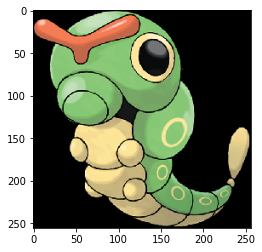

In [ ]:
plt.imshow(dat[1,:,:])


# New Section

In [ ]:
np.random.seed(2013002)
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

#adding some noise

ns_factor = 0.25
x_train_noisy = x_train + ns_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + ns_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

print(x_train_noisy.shape)


(60000, 28, 28, 1)


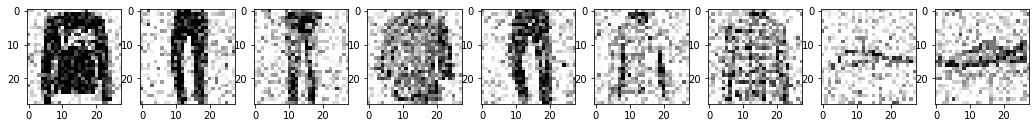

In [ ]:
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
plt.show()

In [ ]:

def Ad_AutoEncoder():
  
  #############  Encoder  ########### 
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(256, 256, 3)))
  model.add(MaxPooling2D((2, 2), padding='same'))
  model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D((2, 2), padding='same'))
  model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
  
  #############  Compression  ########


  model.add(MaxPooling2D((2, 2), padding='same'))
  
  #############  Decoder  ########### 

  model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
  model.add(UpSampling2D((2, 2)))
  model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
  model.add(UpSampling2D((2, 2)))
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(UpSampling2D((2, 2)))

  # model.add(Conv2D(32, (3, 3), activation='relu'))
  # model.add(UpSampling2D((2, 2)))
  model.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))


  return model


In [ ]:
model = Ad_AutoEncoder()
# model.summary()


In [ ]:
x_train_noisy.shape

(60000, 28, 28, 1)

In [ ]:
data.shape

(819, 256, 256, 3)

In [ ]:

model = Ad_AutoEncoder()
model.compile(optimizer='adam', loss='mean_squared_error')


# model.summary()
model.fit(pokemon_data, pokemon_data, epochs=10, batch_size=256, shuffle=True)

# model.evaluate(x_train_noisy, x_test)

Epoch 1/10
4/4 [==============================] - 23s 1s/step - loss: 0.1812
Epoch 2/10
4/4 [==============================] - 3s 667ms/step - loss: 0.1738
Epoch 3/10
4/4 [==============================] - 3s 671ms/step - loss: 0.1530
Epoch 4/10
4/4 [==============================] - 3s 674ms/step - loss: 0.1090
Epoch 5/10
4/4 [==============================] - 3s 662ms/step - loss: 0.0689
Epoch 6/10
4/4 [==============================] - 3s 683ms/step - loss: 0.0598
Epoch 7/10
4/4 [==============================] - 3s 673ms/step - loss: 0.0491
Epoch 8/10
4/4 [==============================] - 3s 683ms/step - loss: 0.0432
Epoch 9/10
4/4 [==============================] - 3s 684ms/step - loss: 0.0397
Epoch 10/10
4/4 [==============================] - 3s 637ms/step - loss: 0.0382


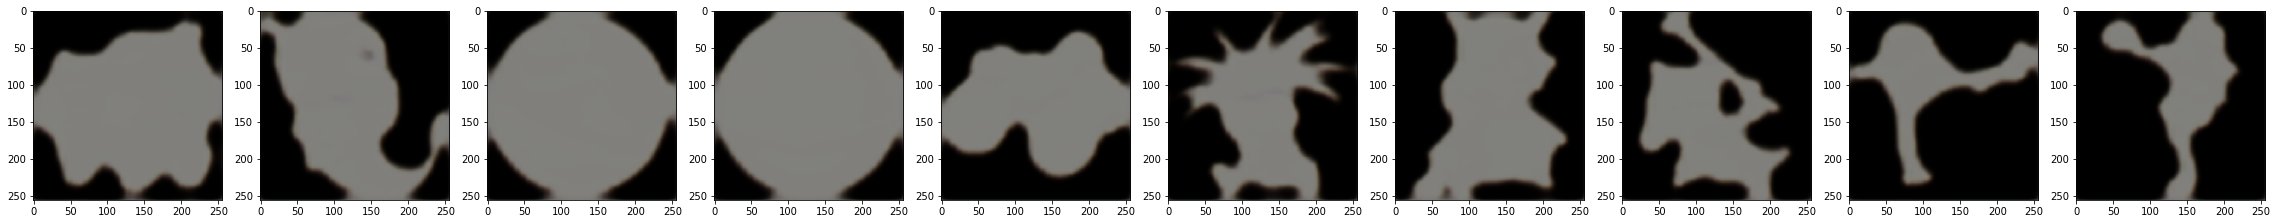

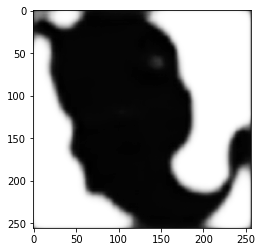

In [ ]:
# model.save('autoencoder_denoised.h5')

fake_images = model.predict(pokemon_data)
fake_images = fake_images

# no_noise_img.shape
plt.figure(figsize=(40, 400))
for i in range(10):
    # # display original
    # ax = plt.subplot(1, 30, i + 1)
    # plt.imshow(fake_images[i,:,:,0], cmap="binary")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(10, 10,i +1)
    plt.imshow(fake_images[i,:,:])


plt.show()
fake_images.shape
plt.imshow(fake_images[1,:,:,0], cmap='binary')
# plt.hist(fake_images[1,:,:].reshape(-1))



Model Training for Fashion MNIST data set

In [ ]:
def Ad_AutoEncoder_FMNIST():
  
  #############  Encoder  ########### 
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2), padding='same'))
  model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D((2, 2), padding='same'))
  model.add(Conv2D(7, (3, 3), activation='relu', padding='same'))
  
  #############  Compression  ########


  # model.add(MaxPooling2D((2, 2), padding='same'))
  
  #############  Decoder  ########### 

  model.add(Conv2D(7, (3, 3), activation='relu', padding='same'))
  model.add(UpSampling2D((2, 2)))
  model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
  model.add(UpSampling2D((2, 2)))
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
  # model.add(UpSampling2D((2, 2)))

  # model.add(Conv2D(28, (3, 3), activation='relu'))
  # model.add(UpSampling2D((2, 2)))
  model.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))


  return model



Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_126 (Conv2D)         (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_127 (Conv2D)         (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 7, 7, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_128 (Conv2D)         (None, 7, 7, 7)           1015      
                                                                 
 conv2d_129 (Conv2D)         (None, 7, 7, 7)         

In [ ]:
model = Ad_AutoEncoder_FMNIST()
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()
#

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_140 (Conv2D)         (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_58 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_141 (Conv2D)         (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_59 (MaxPoolin  (None, 7, 7, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_142 (Conv2D)         (None, 7, 7, 7)           1015      
                                                                 
 conv2d_143 (Conv2D)         (None, 7, 7, 7)         

In [ ]:

model.fit(x_train_noisy, x_train,  epochs=10, batch_size=32, shuffle=True)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0185
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0116
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0106
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0100
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0097
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0094
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0092
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0091
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0090
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0089


In [ ]:
model.evaluate(x_test_noisy, x_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0089


0.00887853279709816

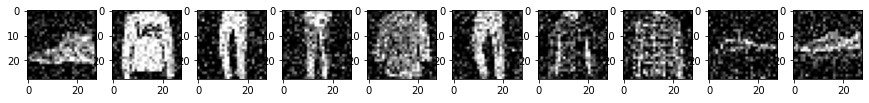

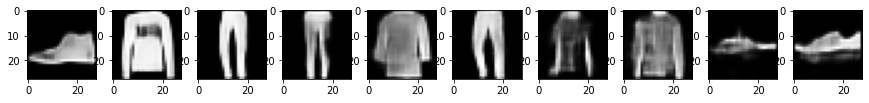

In [ ]:
generated_images = model.predict(x_test_noisy)


plt.figure(figsize=(15, 15))
for i in range(10):
    # display original
    ax = plt.subplot(10, 10, i + 1)
    plt.imshow(x_test_noisy[i,:,:,0], cmap="gray")


# no_noise_img.shape
plt.figure(figsize=(15, 15))
for i in range(10):
    # display original
    # display reconstructed (after noise removed) image
    ax = plt.subplot(10, 10,i +1)
    plt.imshow(generated_images[i,:,:,0], cmap="gray")


plt.show()
# fake_images.shape
# plt.imshow(fake_images[1,:,:,0], cmap='binary')
# plt.hist(fake_images[1,:,:].reshape(-1))

In [ ]:
def FIDs_distance(real , fake):
    
    model = load_model('nFID_classifier12.h5')
    model.pop()
    model.pop()
    model.pop()
    model.pop()
    # model.pop()
    # model.pop()

    # model.summary()
    
    real = model.predict(real)
    fake = model.predict(fake)
    
    # Computing mean
    mean1 = np.mean(real , axis = 0)
    mean2 = np.mean(fake , axis = 0)
    
    # computing variance
    
    var1 = np.cov(real, rowvar = False) # rowvar = false , we need to take the variance along the column 
    var2 = np.cov(fake, rowvar = False)
#     computing difference of mean 

    mean_sq = np.sum((mean1- mean2)**2.0)
    meanvar = sqrtm(np.dot(var1 , var2))
    
    if np.iscomplexobj(meanvar):
        meanvar = meanvar.real
        
    FIDs = mean_sq + trace(var1 + var2 - 2.0 * meanvar)
    
    return FIDs
    

In [ ]:
# fid between images1 and images1
fid = FIDs_distance(x_test, generated_images)
print("------------------------------------------------------------ ")
print("Ferchet Inception Distance Between Real and Generated Images")
print("------------------------------------------------------------\n")

print("-------------------")
print('FIDs =  %.5f' % fid)
print("-------------------\n")

------------------------------------------------------------ 
Ferchet Inception Distance Between Real and Generated Images
------------------------------------------------------------

-------------------
FIDs =  76.30074
-------------------



In [ ]:
def IS_score (images):
    model = load_model('nFID_classifier12.h5')
    pyx = model.predict(images)
    py = np.expand_dims(pyx.mean(axis=0), 0)
    kLdiv = pyx * (np.log(pyx) - np.log(py))
    is_score = np.exp(np.mean(kLdiv.sum(axis=1)))
    is_score = np.array(is_score)
    return is_score

print("------------------------------")
print("Score on Real Image")
print("------------------------------")

RIS_score  = IS_score(x_test)
print(RIS_score)


print("\n------------------------------")
print("Score on Fafke Image")
print("------------------------------")
FIS_score = IS_score(generated_images)
print(FIS_score)

------------------------------
Score on Real Image
------------------------------
5.0531964

------------------------------
Score on Fafke Image
------------------------------
4.041153
